# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [23]:
weather_api_key

'cb3c58a50a341f194e899ab5935a81c8'

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guneysu
Processing Record 2 of Set 1 | dean funes
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | ambovombe
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | guiren
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | richards bay
Processing Record 9 of Set 1 | caluula
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | linton
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | guangming
Processing Record 20 of Set 1 | bardai
Processing Record 21 of Set 1 | taoudenni
Processing Record 22 of S

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guneysu,40.9776,40.6136,13.14,98,100,3.01,TR,1699569703
1,dean funes,-30.4204,-64.3498,20.72,40,7,5.40,AR,1699569666
2,ambovombe,-25.1667,46.0833,21.95,68,27,3.69,MG,1699569703
3,ribeira grande,38.5167,-28.7000,20.99,94,94,10.73,PT,1699569465
4,guiren,33.6697,118.1889,7.40,49,100,6.32,CN,1699569704


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guneysu,40.9776,40.6136,13.14,98,100,3.01,TR,1699569703
1,dean funes,-30.4204,-64.3498,20.72,40,7,5.40,AR,1699569666
2,ambovombe,-25.1667,46.0833,21.95,68,27,3.69,MG,1699569703
3,ribeira grande,38.5167,-28.7000,20.99,94,94,10.73,PT,1699569465
4,guiren,33.6697,118.1889,7.40,49,100,6.32,CN,1699569704


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

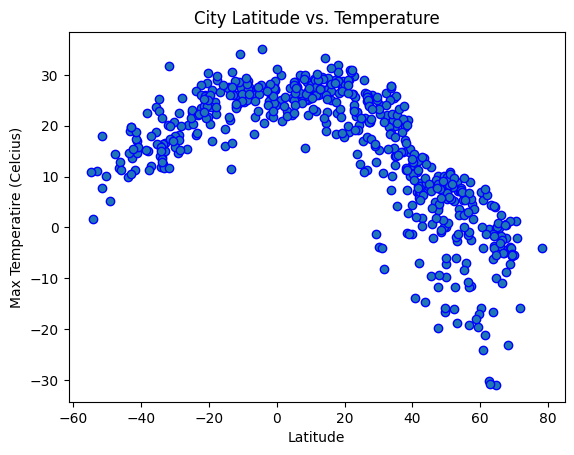

In [58]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='b')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperatire (Celcius)')
plt.title('City Latitude vs. Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

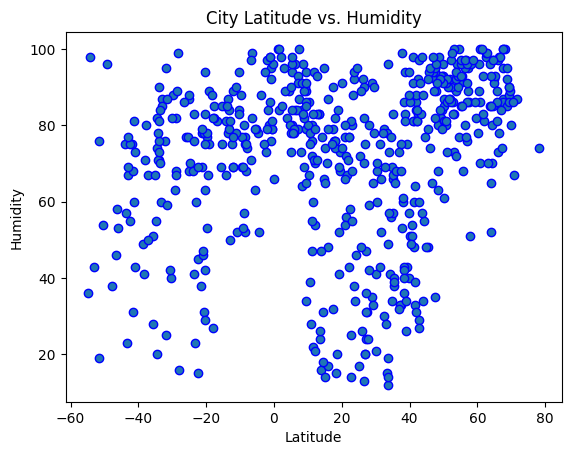

In [65]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='b')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

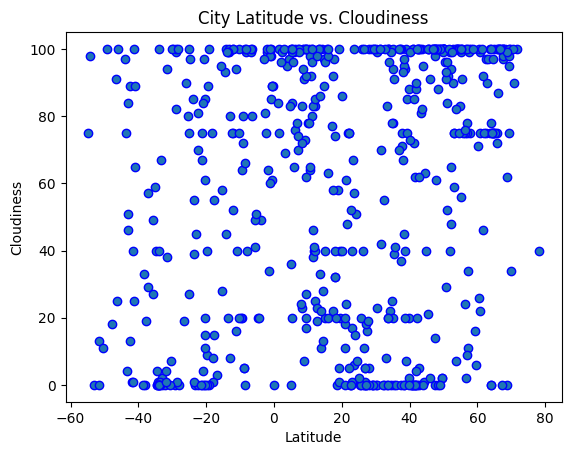

In [60]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='b')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

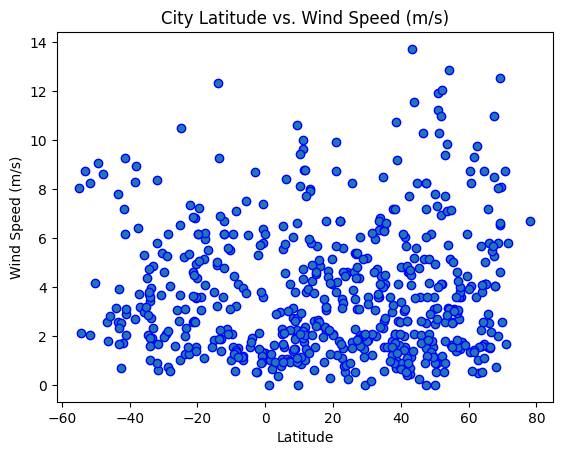

In [61]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='b')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# xval = city_data_df['Lat']
# yval = city_data_df['']
# slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
# regressval = xval * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Defining the labels and making the scatterplots
# plt.scatter(xval, yval)
# plt.plot(xval, regressval, 'r-')
# plt.xlabel('Latitude')
# plt.ylabel('')
# plt.title('City Latitude vs. () w/ Linear Regression')
# plt.show()

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guneysu,40.9776,40.6136,13.14,98,100,3.01,TR,1699569703
3,ribeira grande,38.5167,-28.7000,20.99,94,94,10.73,PT,1699569465
4,guiren,33.6697,118.1889,7.40,49,100,6.32,CN,1699569704
7,caluula,11.9661,50.7569,26.71,70,25,3.78,SO,1699569705
9,linton,39.0348,-87.1658,14.82,26,100,2.62,US,1699569705


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dean funes,-30.4204,-64.3498,20.72,40,7,5.40,AR,1699569666
2,ambovombe,-25.1667,46.0833,21.95,68,27,3.69,MG,1699569703
5,port-aux-francais,-49.3500,70.2167,5.18,96,100,9.05,TF,1699569492
6,richards bay,-28.7830,32.0377,18.09,82,82,0.73,ZA,1699569704
8,port mathurin,-19.6833,63.4167,24.67,77,9,6.17,MU,1699569562


###  Temperature vs. Latitude Linear Regression Plot

R-value is: -0.8423353385573421
Linear Regression Equation is: y = -0.6x + 34.03


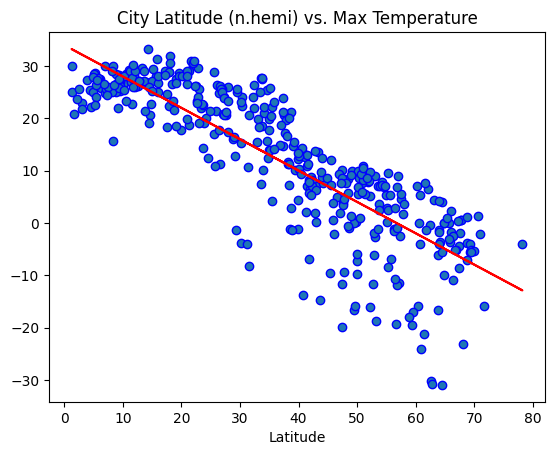

In [99]:
# Linear regression on Northern Hemisphere
xval = northern_hemi_df['Lat']
yval = northern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
regressval = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'R-value is: {rvalue}')
print(f'Linear Regression Equation is: {line_eq}')

plt.scatter(xval, yval, edgecolors='b')
plt.plot(xval, regressval, 'r-')
plt.xlabel('Latitude')
plt.ylabel('')
plt.title('City Latitude (n.hemi) vs. Max Temperature')
plt.show()

R-value is: 0.7639219209833371
Linear Regression Equation is: y = 0.32x + 28.73


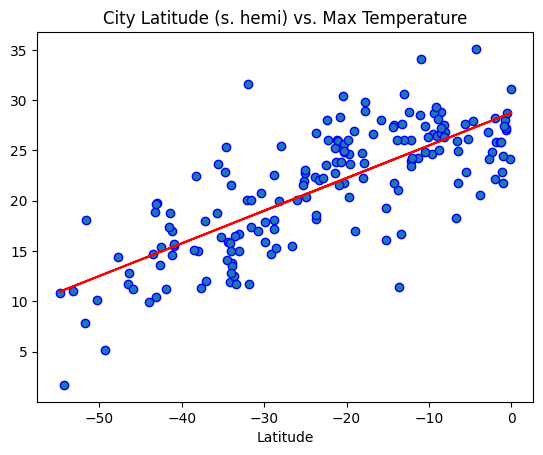

In [98]:
# Linear regression on Southern Hemisphere
xval = southern_hemi_df['Lat']
yval = southern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
regressval = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'R-value is: {rvalue}')
print(f'Linear Regression Equation is: {line_eq}')

plt.scatter(xval, yval, edgecolors='b')
plt.plot(xval, regressval, 'r-')
plt.xlabel('Latitude')
plt.ylabel('')
plt.title('City Latitude (s. hemi) vs. Max Temperature')
plt.show()

**Discussion about the linear relationship:** Although the northern hemisphere had more points for me to work with, the data was still fine to work with. The southern hemisphere differed a little more with an r-value of 0.76.

### Humidity vs. Latitude Linear Regression Plot

R-value is: 0.2680103253966841
Linear Regression Equation is: y = 0.31x + 61.34


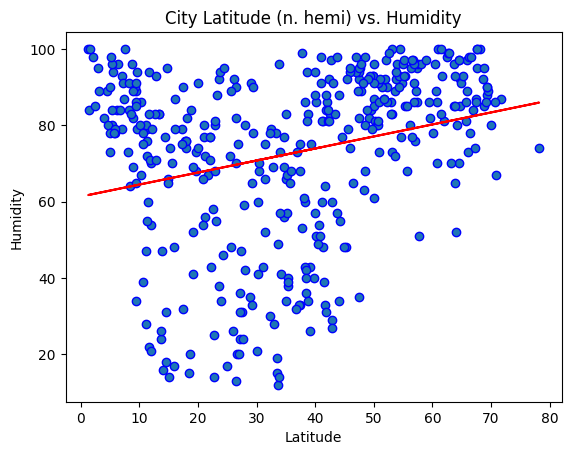

In [113]:
# Northern Hemisphere
xval = northern_hemi_df['Lat']
yval = northern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
regressval = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'R-value is: {rvalue}')
print(f'Linear Regression Equation is: {line_eq}')

plt.scatter(xval, yval, edgecolors='b')
plt.plot(xval, regressval, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude (n. hemi) vs. Humidity')
plt.show()

R-value is: 0.3614496301647776
Linear Regression Equation is: y = 0.49x + 80.83


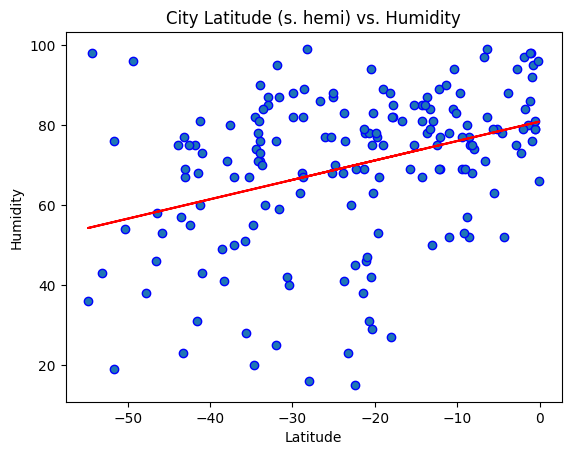

In [115]:
# Southern Hemisphere
xval = southern_hemi_df['Lat']
yval = southern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
regressval = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'R-value is: {rvalue}')
print(f'Linear Regression Equation is: {line_eq}')

plt.scatter(xval, yval, edgecolors='b')
plt.plot(xval, regressval, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude (s. hemi) vs. Humidity')
plt.show()

**Discussion about the linear relationship:** Both of the r values were not close to 1 and were very widespread but this means that there is not a distint correlation between humidity and latitude. Although the scatterplot does seem to indicate that most of the data is in the upper half of the y values (above 60), meaning that a humidity above 60 is common in many areas.

### Cloudiness vs. Latitude Linear Regression Plot

R-value is: 0.13991033658974442
Linear Regression Equation is: y = 0.28x + 52.57


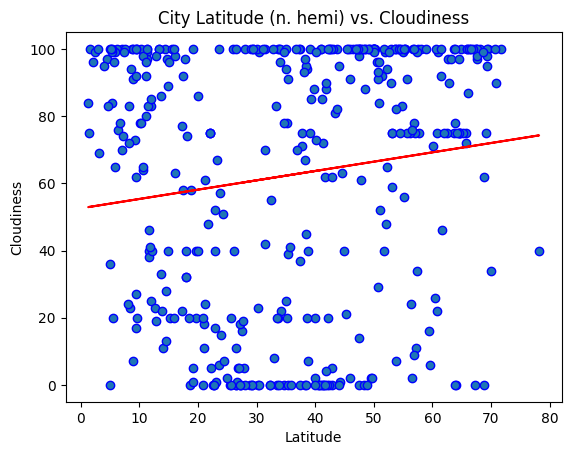

In [111]:
# Northern Hemisphere
xval = northern_hemi_df['Lat']
yval = northern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
regressval = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'R-value is: {rvalue}')
print(f'Linear Regression Equation is: {line_eq}')

plt.scatter(xval, yval, edgecolors='b')
plt.plot(xval, regressval, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude (n. hemi) vs. Cloudiness')
plt.show()

R-value is: 0.2680441466876953
Linear Regression Equation is: y = 0.73x + 66.55


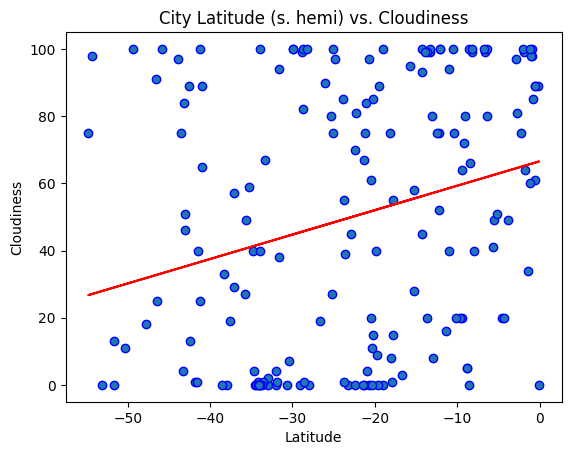

In [110]:
# Southern Hemisphere
xval = southern_hemi_df['Lat']
yval = southern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
regressval = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'R-value is: {rvalue}')
print(f'Linear Regression Equation is: {line_eq}')

plt.scatter(xval, yval, edgecolors='b')
plt.plot(xval, regressval, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude (s. hemi) vs. Cloudiness')
plt.show()

**Discussion about the linear relationship:** Similar to humidity the cloudiness does not seem to have any correlation with latitude as the r values are 0.26 for the southern hemisphere and 0.13 for the northern hemisphere. We do see a lot of points around 0 or 100 as well when it comes to humidity, which is interesting.

### Wind Speed vs. Latitude Linear Regression Plot

R-value is: 0.15367283344484772
Linear Regression Equation is: y = 0.02x + 2.94


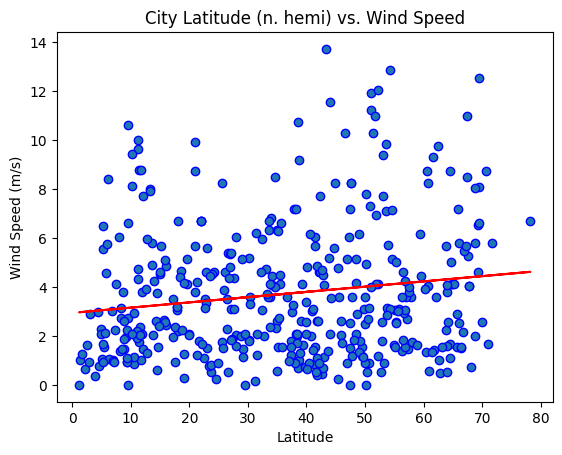

In [112]:
# Northern Hemisphere
xval = northern_hemi_df['Lat']
yval = northern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
regressval = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'R-value is: {rvalue}')
print(f'Linear Regression Equation is: {line_eq}')

plt.scatter(xval, yval, edgecolors='b')
plt.plot(xval, regressval, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude (n. hemi) vs. Wind Speed')
plt.show()

R-value is: -0.1216848524692039
Linear Regression Equation is: y = -0.02x + 3.36


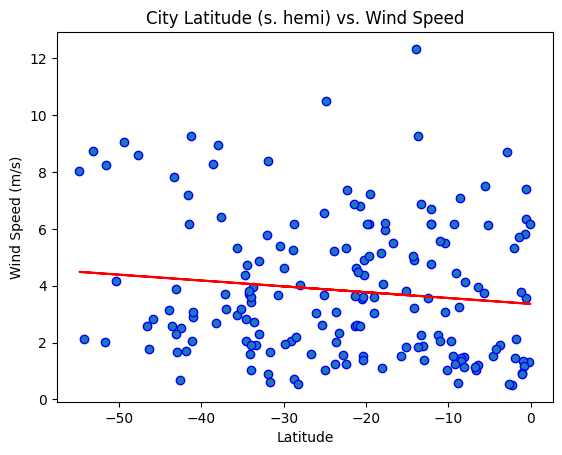

In [117]:
# Southern Hemisphere
xval = southern_hemi_df['Lat']
yval = southern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
regressval = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'R-value is: {rvalue}')
print(f'Linear Regression Equation is: {line_eq}')

plt.scatter(xval, yval, edgecolors='b')
plt.plot(xval, regressval, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude (s. hemi) vs. Wind Speed')
plt.show()

**Discussion about the linear relationship:** Looking at the wind speeds, we see a lot mroe points in the northern hemisphere data making the data look more condensed when really the r values are close to the same at 0.15 for the northern hemisphere and 0.12 for the southern hemisphere.